In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [14]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [15]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [34]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [44]:

Optimizer = tf.keras.optimizers.Adam(
    learning_rate=0.0005,
    beta_1=0.9,
    beta_2=0.99,
    epsilon=1e-7,
    name='Adam'
)
model.compile(loss='sparse_categorical_crossentropy', optimizer=Optimizer, metrics=['accuracy'])
model.fit(x_train , y_train,  epochs=4)
model.save('handwritten.model')

Epoch 1/4
1875/1875 [==============================] - 31s 15ms/step - loss: 0.0373 - accuracy: 0.9881
Epoch 2/4
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0289 - accuracy: 0.9913
Epoch 3/4
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0237 - accuracy: 0.9931
Epoch 4/4
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0200 - accuracy: 0.9935


INFO:tensorflow:Assets written to: handwritten.model/assets


INFO:tensorflow:Assets written to: handwritten.model/assets


In [45]:
model = tf.keras.models.load_model('handwritten.model')

1/1 [==============================] - 0s 249ms/step
This digit is probably a 7 


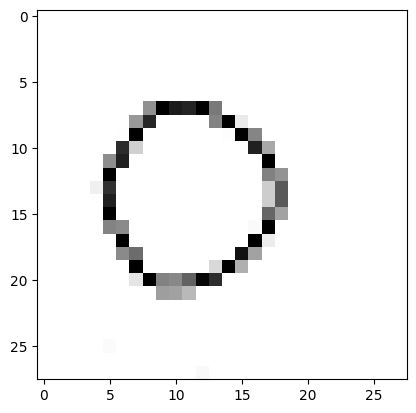

1/1 [==============================] - 0s 84ms/step
This digit is probably a 1 


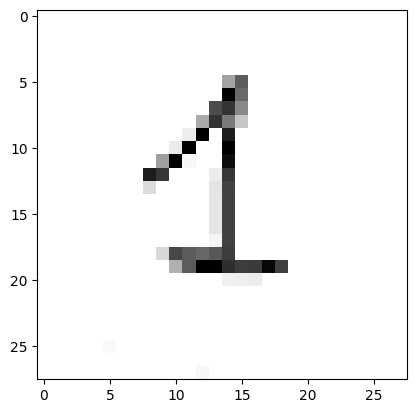

1/1 [==============================] - 0s 54ms/step
This digit is probably a 5 


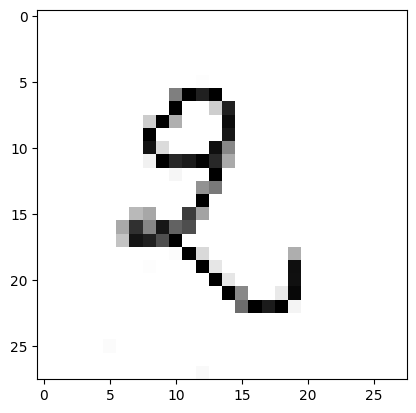

1/1 [==============================] - 0s 96ms/step
This digit is probably a 3 


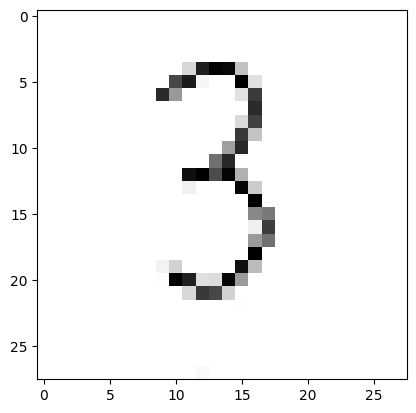

1/1 [==============================] - 0s 73ms/step
This digit is probably a 6 


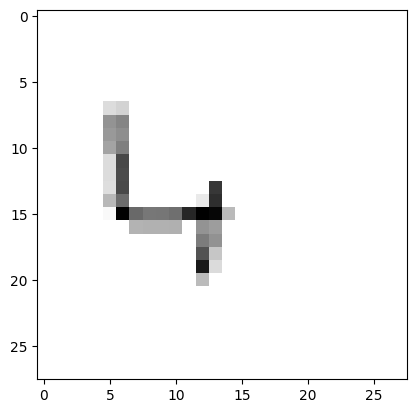

1/1 [==============================] - 0s 59ms/step
This digit is probably a 5 


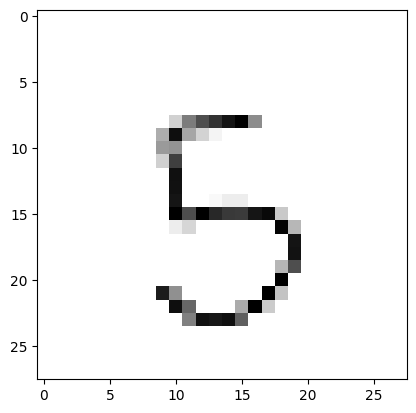

1/1 [==============================] - 0s 57ms/step
This digit is probably a 5 


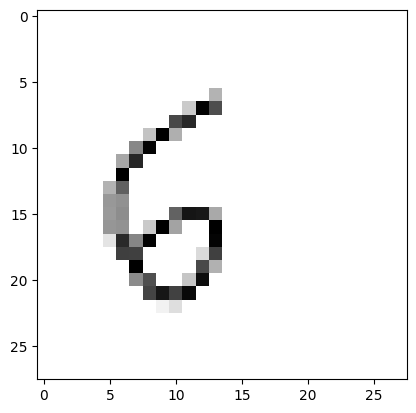

1/1 [==============================] - 0s 62ms/step
This digit is probably a 7 


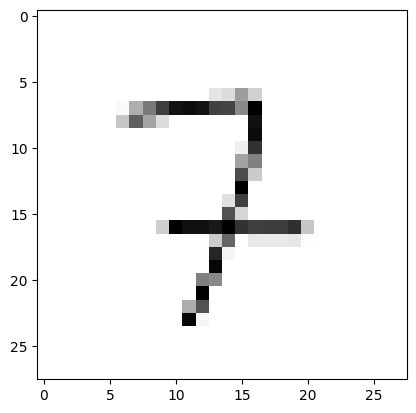

1/1 [==============================] - 0s 56ms/step
This digit is probably a 1 


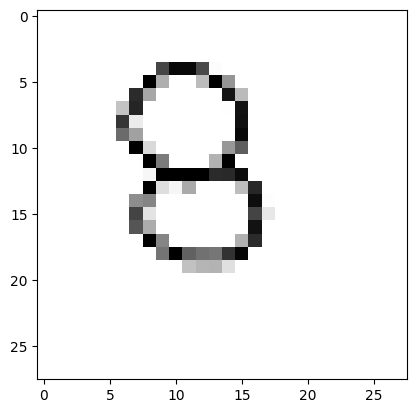

1/1 [==============================] - 0s 54ms/step
This digit is probably a 3 


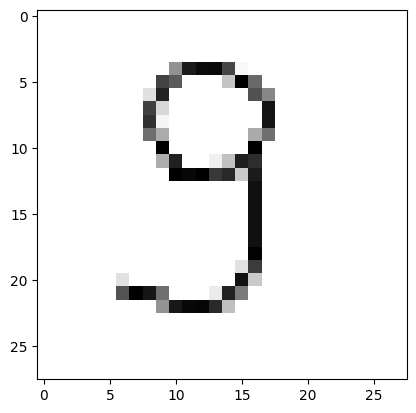

In [46]:
image_number = 1

while os.path.isfile(f"Digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"Digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(F"This digit is probably a {np.argmax(prediction)} ")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print('Error!!!!!')
    finally:
        image_number +=1
